In [147]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
transform = transforms.ToTensor()

In [148]:
transform = transforms.ToTensor()
train_data= datasets.MNIST(root='C:\\Users\\harshi\\dataset\\mnist_train', train=True, download=True, transform=transform)
test_data= datasets.MNIST(root='C:\\Users\\harshi\\dataset\\mnist_train', train=False, download=True, transform=transform)
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: C:\Users\harshi\dataset\mnist_train
    Split: Train
    StandardTransform
Transform: ToTensor()

In [149]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: C:\Users\harshi\dataset\mnist_train
    Split: Test
    StandardTransform
Transform: ToTensor()

In [150]:
trainLoad = DataLoader(train_data, batch_size=500, shuffle=True)
testLoad = DataLoader(test_data, batch_size=100, shuffle=False)

In [151]:
# Function to calculate number of trainable parameters
def calc_params(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
# Model1 class with the same logic but different structure
class Model1(nn.Module):
    def __init__(self, input_size=784, hidden1_size=4, hidden2_size=7, output_size=10):
        super(Model1, self).__init__()
        
        # Define the layers
        self.layers = nn.Sequential(
            nn.Linear(input_size, hidden1_size),
            nn.ReLU(),
            nn.Linear(hidden1_size, hidden2_size),
            nn.ReLU(),
            nn.Linear(hidden2_size, output_size)
        )
    
    # Forward pass
    def forward(self, x):
        return self.layers(x)
model1=Model1()
model1

Model1(
  (layers): Sequential(
    (0): Linear(in_features=784, out_features=4, bias=True)
    (1): ReLU()
    (2): Linear(in_features=4, out_features=7, bias=True)
    (3): ReLU()
    (4): Linear(in_features=7, out_features=10, bias=True)
  )
)

In [152]:
model1params = sum(p.numel() for p in model1.parameters() if p.requires_grad)
print(model1params)

3255


In [153]:
criterion1 = nn.CrossEntropyLoss()
optimizer1 = torch.optim.Adam(model1.parameters(), lr=0.001)

In [154]:
epochs = 10
train_correct_mod1, test_correct_mod1 = [], []

for epoch in range(epochs):
    train_corr, test_corr = 0, 0

    # Training phase
    for batch_idx, (X_train, y_train) in enumerate(trainLoad):
        
        # Forward pass
        y_pred = model1(X_train.view(X_train.size(0), -1))  
        loss = criterion1(y_pred, y_train)

        # Count correct predictions
        _, predicted = torch.max(y_pred.data, 1)
        train_corr += (predicted == y_train).sum()

        # Backpropagation and optimizer step
        optimizer1.zero_grad()
        loss.backward()
        optimizer1.step()

    # Track training performance
    train_losses_mod1 = loss  # Storing the loss from the last batch
    train_correct_mod1.append(train_corr)

    # Evaluation phase (testing)
    with torch.no_grad():
        for batch_idx, (X_test, y_test) in enumerate(testLoad):

            # Forward pass on test data
            y_val = model1(X_test.view(X_test.size(0), -1))

            # Count correct predictions
            _, predicted = torch.max(y_val.data, 1)
            test_corr += (predicted == y_test).sum()

    # Track testing performance
    test_losses_mod1 = loss  # Storing the loss from the last batch of test
    test_correct_mod1.append(test_corr)


In [155]:
train_losses_mod1= train_losses_mod1.detach().numpy()
for t in train_correct_mod1:
    trn_accu_mod1=t/600
print(trn_accu_mod1)
for t in test_correct_mod1:
    tst_accu_mod1=t/100   
print(tst_accu_mod1)


tensor(79.4983)
tensor(80.2400)


In [156]:
class Model2(nn.Module):
    def __init__(self, input_size=784, hidden1_size=6, hidden2_size=9, output_size=10):
        super(Model2, self).__init__()
        
        # Define layers using nn.Sequential for better organization
        self.layers = nn.Sequential(
            nn.Linear(input_size, hidden1_size),
            nn.ReLU(),
            nn.Linear(hidden1_size, hidden2_size),
            nn.ReLU(),
            nn.Linear(hidden2_size, output_size)
        )

    # Forward pass through the network
    def forward(self, x):
        return self.layers(x)
model2=Model2()
model2

Model2(
  (layers): Sequential(
    (0): Linear(in_features=784, out_features=6, bias=True)
    (1): ReLU()
    (2): Linear(in_features=6, out_features=9, bias=True)
    (3): ReLU()
    (4): Linear(in_features=9, out_features=10, bias=True)
  )
)

In [157]:
model2params = sum(p.numel() for p in model2.parameters() if p.requires_grad)
print(model2params)

4873


In [158]:
criterion2 = nn.CrossEntropyLoss()
optimizer2 = torch.optim.Adam(model2.parameters(), lr=0.001)
epochs = 10
train_correct_mod2, test_correct_mod2 = [], []

for epoch in range(epochs):
    train_corr, test_corr = 0, 0

    # Training phase
    for batch_idx, (X_train, y_train) in enumerate(trainLoad):
        
        # Forward pass through the model
        y_pred = model2(X_train.view(X_train.size(0), -1))  
        loss = criterion2(y_pred, y_train)

        # Count correct predictions
        _, predicted = torch.max(y_pred.data, 1)
        train_corr += (predicted == y_train).sum()

        # Backpropagation and optimizer step
        optimizer2.zero_grad()
        loss.backward()
        optimizer2.step()

    # Track training loss and accuracy for the epoch
    train_losses_mod2 = loss  # Store loss from the last batch
    train_correct_mod2.append(train_corr)

    # Testing phase
    with torch.no_grad():
        for batch_idx, (X_test, y_test) in enumerate(testLoad):

            # Forward pass on test data
            y_val = model2(X_test.view(X_test.size(0), -1))

            # Count correct predictions
            _, predicted = torch.max(y_val.data, 1)
            test_corr += (predicted == y_test).sum()

    # Track testing loss and accuracy for the epoch
    test_losses_mod2 = loss  # Store loss from the last batch of test
    test_correct_mod2.append(test_corr)
train_losses_mod2= train_losses_mod2.detach().numpy()
for t in train_correct_mod2:
    trn_accu_mod2=t/600 
print(trn_accu_mod2)
for t in test_correct_mod2:
    tst_accu_mod2=t/100   
print(tst_accu_mod2)

tensor(89.5117)
tensor(89.5800)


In [159]:
class Model3(nn.Module):
    def __init__(self, input_size=784, hidden1_size=11, hidden2_size=20, output_size=10):
        super(Model3, self).__init__()

        # Layers defined in a Sequential container for better organization
        self.layers = nn.Sequential(
            nn.Linear(input_size, hidden1_size),
            nn.ReLU(),
            nn.Linear(hidden1_size, hidden2_size),
            nn.ReLU(),
            nn.Linear(hidden2_size, output_size)
        )
    
    # Forward pass through the network
    def forward(self, x):
        return self.layers(x)
model3=Model3()
model3

Model3(
  (layers): Sequential(
    (0): Linear(in_features=784, out_features=11, bias=True)
    (1): ReLU()
    (2): Linear(in_features=11, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=10, bias=True)
  )
)

In [160]:
model3params = sum(p.numel() for p in model3.parameters() if p.requires_grad)
print(model3params)

9085


In [161]:
criterion3 = nn.CrossEntropyLoss()
optimizer3 = torch.optim.Adam(model3.parameters(), lr=0.001)
epochs = 10
train_correct_mod3, test_correct_mod3 = [], []

for epoch in range(epochs):
    train_corr, test_corr = 0, 0

    # Training phase
    for batch_idx, (X_train, y_train) in enumerate(trainLoad):
        
        # Forward pass through model
        y_pred = model3(X_train.view(X_train.size(0), -1))  
        loss = criterion3(y_pred, y_train)

        # Tally correct predictions
        _, predicted = torch.max(y_pred.data, 1)
        train_corr += (predicted == y_train).sum()

        # Backpropagation and optimizer step
        optimizer3.zero_grad()
        loss.backward()
        optimizer3.step()

    # Track training loss and accuracy for the epoch
    train_losses_mod3 = loss  # Store the last batch's loss
    train_correct_mod3.append(train_corr)

    # Evaluation phase (testing)
    with torch.no_grad():
        for batch_idx, (X_test, y_test) in enumerate(testLoad):

            # Forward pass on test data
            y_val = model3(X_test.view(X_test.size(0), -1))

            # Tally correct predictions
            _, predicted = torch.max(y_val.data, 1)
            test_corr += (predicted == y_test).sum()

    # Track testing loss and accuracy for the epoch
    test_losses_mod3 = loss  # Store the last batch's loss
    test_correct_mod3.append(test_corr)

train_losses_mod3= train_losses_mod3.detach().numpy()
for t in train_correct_mod3:
    trn_accu_mod3=t/600    
print(trn_accu_mod3)
for t in test_correct_mod3:
    tst_accu_mod3=t/100    
print(tst_accu_mod3)

tensor(92.3200)
tensor(92.5500)


In [162]:
class Model4(nn.Module):
    def __init__(self, input_size=784, hidden1_size=15, hidden2_size=26, output_size=10):
        super(Model4, self).__init__()

        # Layers defined in a Sequential container for better organization
        self.layers = nn.Sequential(
            nn.Linear(input_size, hidden1_size),
            nn.ReLU(),
            nn.Linear(hidden1_size, hidden2_size),
            nn.ReLU(),
            nn.Linear(hidden2_size, output_size)
        )
    
    # Forward pass through the network
    def forward(self, x):
        return self.layers(x)
model4=Model4()
model4

Model4(
  (layers): Sequential(
    (0): Linear(in_features=784, out_features=15, bias=True)
    (1): ReLU()
    (2): Linear(in_features=15, out_features=26, bias=True)
    (3): ReLU()
    (4): Linear(in_features=26, out_features=10, bias=True)
  )
)

In [163]:
model4params = sum(p.numel() for p in model4.parameters() if p.requires_grad)
print(model4params)

12461


In [164]:
criterion4 = nn.CrossEntropyLoss()
optimizer4 = torch.optim.Adam(model4.parameters(), lr=0.001)

In [165]:
criterion4 = nn.CrossEntropyLoss()
optimizer4 = torch.optim.Adam(model4.parameters(), lr=0.001)
epochs = 10
train_correct_mod4, test_correct_mod4 = [], []

for epoch in range(epochs):
    train_corr, test_corr = 0, 0

    # Training phase
    for batch_idx, (X_train, y_train) in enumerate(trainLoad):
        
        # Forward pass through the model
        y_pred = model4(X_train.view(X_train.size(0), -1))  
        loss = criterion4(y_pred, y_train)

        # Count correct predictions
        _, predicted = torch.max(y_pred.data, 1)
        train_corr += (predicted == y_train).sum()

        # Backpropagation and optimizer update
        optimizer4.zero_grad()
        loss.backward()
        optimizer4.step()

    # Track training loss and accuracy for the epoch
    train_losses_mod4 = loss.detach().numpy()  # Detach and convert to numpy
    train_correct_mod4.append(train_corr)

    # Testing phase (evaluation)
    with torch.no_grad():
        for batch_idx, (X_test, y_test) in enumerate(testLoad):

            # Forward pass on the test data
            y_val = model4(X_test.view(X_test.size(0), -1))

            # Count correct predictions
            _, predicted = torch.max(y_val.data, 1)
            test_corr += (predicted == y_test).sum()

    # Track test loss and accuracy for the epoch
    loss = criterion4(y_val, y_test)
    test_losses_mod4 = loss.detach().numpy()  # Detach and convert to numpy
    test_correct_mod4.append(test_corr)    
for t in train_correct_mod4:
    trn_accu_mod4=t/600    
print(trn_accu_mod4)
for t in test_correct_mod4:
    tst_accu_mod4=t/100    
print(tst_accu_mod4)

tensor(94.2300)
tensor(94.4100)


In [166]:
class Model5(nn.Module):
    def __init__(self, input_size=784, hidden1_size=62, hidden2_size=92, output_size=10):
        super(Model5, self).__init__()

        # Layers defined in a Sequential container for better organization
        self.layers = nn.Sequential(
            nn.Linear(input_size, hidden1_size),
            nn.ReLU(),
            nn.Linear(hidden1_size, hidden2_size),
            nn.ReLU(),
            nn.Linear(hidden2_size, output_size)
        )
    
    # Forward pass through the network
    def forward(self, x):
        return self.layers(x)
model5=Model5()
model5

Model5(
  (layers): Sequential(
    (0): Linear(in_features=784, out_features=62, bias=True)
    (1): ReLU()
    (2): Linear(in_features=62, out_features=92, bias=True)
    (3): ReLU()
    (4): Linear(in_features=92, out_features=10, bias=True)
  )
)

In [167]:
model5params = sum(p.numel() for p in model5.parameters() if p.requires_grad)
print(model5params)

55396


In [168]:
criterion5 = nn.CrossEntropyLoss()
optimizer5 = torch.optim.Adam(model5.parameters(), lr=0.001)
epochs = 10
train_correct_mod5, test_correct_mod5 = [], []

for epoch in range(epochs):
    train_corr, test_corr = 0, 0

    # Training phase
    for batch_idx, (X_train, y_train) in enumerate(trainLoad):
        
        # Forward pass through model
        y_pred = model5(X_train.view(X_train.size(0), -1))  
        loss = criterion5(y_pred, y_train)

        # Tally correct predictions
        _, predicted = torch.max(y_pred.data, 1)
        train_corr += (predicted == y_train).sum()

        # Backpropagation and optimizer step
        optimizer5.zero_grad()
        loss.backward()
        optimizer5.step()

    # Track training loss and accuracy for the epoch
    train_losses_mod5 = loss  # Store the last batch's loss
    train_correct_mod5.append(train_corr)

    # Evaluation phase (testing)
    with torch.no_grad():
        for batch_idx, (X_test, y_test) in enumerate(testLoad):

            # Forward pass on test data
            y_val = model5(X_test.view(X_test.size(0), -1))

            # Tally correct predictions
            _, predicted = torch.max(y_val.data, 1)
            test_corr += (predicted == y_test).sum()

    # Track testing loss and accuracy for the epoch
    test_losses_mod5 = loss  # Store the last batch's loss
    test_correct_mod5.append(test_corr)

train_losses_mod5= train_losses_mod5.detach().numpy()
for t in train_correct_mod5:
    trn_accu_mod5=t/600    
print(trn_accu_mod5)
for t in test_correct_mod5:
    tst_accu_mod5=t/100    
print(tst_accu_mod5)


tensor(97.0050)
tensor(96.4400)


In [169]:
for t in train_correct_mod5:
    trn_accu_mod5=t/600    
print(trn_accu_mod5)
for t in test_correct_mod5:
    tst_accu_mod5=t/100    
print(tst_accu_mod5)

tensor(97.0050)
tensor(96.4400)


In [170]:
class Model6(nn.Module):
    def __init__(self, input_size=784, hidden1_size=70, hidden2_size=110, output_size=10):
        super(Model6, self).__init__()

        # Layers defined in a Sequential container for better organization
        self.layers = nn.Sequential(
            nn.Linear(input_size, hidden1_size),
            nn.ReLU(),
            nn.Linear(hidden1_size, hidden2_size),
            nn.ReLU(),
            nn.Linear(hidden2_size, output_size)
        )
    
    # Forward pass through the network
    def forward(self, x):
        return self.layers(x)
model6=Model6()
model6

Model6(
  (layers): Sequential(
    (0): Linear(in_features=784, out_features=70, bias=True)
    (1): ReLU()
    (2): Linear(in_features=70, out_features=110, bias=True)
    (3): ReLU()
    (4): Linear(in_features=110, out_features=10, bias=True)
  )
)

In [171]:
model6params = sum(p.numel() for p in model6.parameters() if p.requires_grad)
print(model6params)

63870


In [172]:
criterion6 = nn.CrossEntropyLoss()
optimizer6 = torch.optim.Adam(model6.parameters(), lr=0.001)
epochs = 10
train_correct_mod6, test_correct_mod6 = [], []

for epoch in range(epochs):
    train_corr, test_corr = 0, 0

    # Training phase
    for batch_idx, (X_train, y_train) in enumerate(trainLoad):
        
        # Forward pass through the model
        y_pred = model6(X_train.view(X_train.size(0), -1))  
        loss = criterion6(y_pred, y_train)

        # Count correct predictions
        _, predicted = torch.max(y_pred.data, 1)
        train_corr += (predicted == y_train).sum()

        # Backpropagation and optimizer update
        optimizer6.zero_grad()
        loss.backward()
        optimizer6.step()

    # Track training loss and accuracy for the epoch
    train_losses_mod6 = loss.detach().numpy()  # Detach and convert to numpy
    train_correct_mod6.append(train_corr)

    # Testing phase (evaluation)
    with torch.no_grad():
        for batch_idx, (X_test, y_test) in enumerate(testLoad):

            # Forward pass on the test data
            y_val = model6(X_test.view(X_test.size(0), -1))

            # Count correct predictions
            _, predicted = torch.max(y_val.data, 1)
            test_corr += (predicted == y_test).sum()

    # Track test loss and accuracy for the epoch
    loss = criterion6(y_val, y_test)
    test_losses_mod6 = loss.detach().numpy()  # Detach and convert to numpy
    test_correct_mod6.append(test_corr)
       

In [173]:
for t in train_correct_mod6:
    trn_accu_mod6=t/600    
print(trn_accu_mod6)
for t in test_correct_mod6:
    tst_accu_mod6=t/100    
print(tst_accu_mod6)

tensor(97.5683)
tensor(96.7100)


In [174]:
class Model7(nn.Module):
    def __init__(self, input_size=784, hidden1_size=130, hidden2_size=180, output_size=10):
        super(Model7, self).__init__()

        # Layers defined in a Sequential container for better organization
        self.layers = nn.Sequential(
            nn.Linear(input_size, hidden1_size),
            nn.ReLU(),
            nn.Linear(hidden1_size, hidden2_size),
            nn.ReLU(),
            nn.Linear(hidden2_size, output_size)
        )
    
    # Forward pass through the network
    def forward(self, x):
        return self.layers(x)
model7=Model7()
model7

Model7(
  (layers): Sequential(
    (0): Linear(in_features=784, out_features=130, bias=True)
    (1): ReLU()
    (2): Linear(in_features=130, out_features=180, bias=True)
    (3): ReLU()
    (4): Linear(in_features=180, out_features=10, bias=True)
  )
)

In [175]:
model7params = sum(p.numel() for p in model7.parameters() if p.requires_grad)
print(model7params)

127440


In [176]:
criterion7 = nn.CrossEntropyLoss()
optimizer7 = torch.optim.Adam(model7.parameters(), lr=0.001)
epochs = 10
train_correct_mod7, test_correct_mod7 = [], []

for epoch in range(epochs):
    train_corr, test_corr = 0, 0

    # Training phase
    for batch_idx, (X_train, y_train) in enumerate(trainLoad):
        
        # Forward pass through the model
        y_pred = model7(X_train.view(X_train.size(0), -1))  
        loss = criterion7(y_pred, y_train)

        # Count correct predictions
        _, predicted = torch.max(y_pred.data, 1)
        train_corr += (predicted == y_train).sum()

        # Backpropagation and optimizer update
        optimizer7.zero_grad()
        loss.backward()
        optimizer7.step()

    # Track training loss and accuracy for the epoch
    train_losses_mod7 = loss.detach().numpy()  # Detach and convert to numpy
    train_correct_mod7.append(train_corr)

    # Testing phase (evaluation)
    with torch.no_grad():
        for batch_idx, (X_test, y_test) in enumerate(testLoad):

            # Forward pass on the test data
            y_val = model7(X_test.view(X_test.size(0), -1))

            # Count correct predictions
            _, predicted = torch.max(y_val.data, 1)
            test_corr += (predicted == y_test).sum()

    # Track test loss and accuracy for the epoch
    loss = criterion7(y_val, y_test)
    test_losses_mod7 = loss.detach().numpy()  # Detach and convert to numpy
    test_correct_mod7.append(test_corr)
       
        

In [177]:
for t in train_correct_mod7:
    trn_accu_mod7=t/600    
print(trn_accu_mod7)
for t in test_correct_mod7:
    tst_accu_mod7=t/100    
print(tst_accu_mod7)

tensor(98.3350)
tensor(97.4900)


In [178]:
class Model8(nn.Module):
    def __init__(self, input_size=784, hidden1_size=200, hidden2_size=400, output_size=10):
        super(Model8, self).__init__()

        # Layers defined in a Sequential container for better organization
        self.layers = nn.Sequential(
            nn.Linear(input_size, hidden1_size),
            nn.ReLU(),
            nn.Linear(hidden1_size, hidden2_size),
            nn.ReLU(),
            nn.Linear(hidden2_size, output_size)
        )
    
    # Forward pass through the network
    def forward(self, x):
        return self.layers(x)
model8=Model8()
model8

Model8(
  (layers): Sequential(
    (0): Linear(in_features=784, out_features=200, bias=True)
    (1): ReLU()
    (2): Linear(in_features=200, out_features=400, bias=True)
    (3): ReLU()
    (4): Linear(in_features=400, out_features=10, bias=True)
  )
)

In [179]:
model8params = sum(p.numel() for p in model8.parameters() if p.requires_grad)
print(model8params)

241410


In [180]:
criterion8 = nn.CrossEntropyLoss()
optimizer8 = torch.optim.Adam(model8.parameters(), lr=0.001)
epochs = 10
train_correct_mod8, test_correct_mod8 = [], []

for epoch in range(epochs):
    train_corr, test_corr = 0, 0

    # Training phase
    for batch_idx, (X_train, y_train) in enumerate(trainLoad):
        
        # Forward pass through the model
        y_pred = model8(X_train.view(X_train.size(0), -1))  
        loss = criterion8(y_pred, y_train)

        # Count correct predictions
        _, predicted = torch.max(y_pred.data, 1)
        train_corr += (predicted == y_train).sum()

        # Backpropagation and optimizer update
        optimizer8.zero_grad()
        loss.backward()
        optimizer8.step()

    # Track training loss and accuracy for the epoch
    train_losses_mod8 = loss.detach().numpy()  # Detach and convert to numpy
    train_correct_mod8.append(train_corr)

    # Testing phase (evaluation)
    with torch.no_grad():
        for batch_idx, (X_test, y_test) in enumerate(testLoad):

            # Forward pass on the test data
            y_val = model8(X_test.view(X_test.size(0), -1))

            # Count correct predictions
            _, predicted = torch.max(y_val.data, 1)
            test_corr += (predicted == y_test).sum()

    # Track test loss and accuracy for the epoch
    loss = criterion8(y_val, y_test)
    test_losses_mod8 = loss.detach().numpy()  # Detach and convert to numpy
    test_correct_mod8.append(test_corr)
       

In [181]:
for t in train_correct_mod8:
    trn_accu_mod8=t/600    
print(trn_accu_mod8)
for t in test_correct_mod8:
    tst_accu_mod8=t/100
    
print(tst_accu_mod8)

tensor(99.1550)
tensor(97.9100)


In [182]:
class Model9(nn.Module):
    def __init__(self, input_size=784, hidden1_size=300, hidden2_size=600, output_size=10):
        super(Model9, self).__init__()

        # Layers defined in a Sequential container for better organization
        self.layers = nn.Sequential(
            nn.Linear(input_size, hidden1_size),
            nn.ReLU(),
            nn.Linear(hidden1_size, hidden2_size),
            nn.ReLU(),
            nn.Linear(hidden2_size, output_size)
        )
    
    # Forward pass through the network
    def forward(self, x):
        return self.layers(x)
model9=Model9()
model9

Model9(
  (layers): Sequential(
    (0): Linear(in_features=784, out_features=300, bias=True)
    (1): ReLU()
    (2): Linear(in_features=300, out_features=600, bias=True)
    (3): ReLU()
    (4): Linear(in_features=600, out_features=10, bias=True)
  )
)

In [183]:
model9params = sum(p.numel() for p in model9.parameters() if p.requires_grad)
print(model9params)

422110


In [184]:
criterion9 = nn.CrossEntropyLoss()
optimizer9 = torch.optim.Adam(model9.parameters(), lr=0.001)
epochs = 10
train_correct_mod9, test_correct_mod9 = [], []

for epoch in range(epochs):
    train_corr, test_corr = 0, 0

    # Training phase
    for batch_idx, (X_train, y_train) in enumerate(trainLoad):
        
        # Forward pass through the model
        y_pred = model9(X_train.view(X_train.size(0), -1))  
        loss = criterion9(y_pred, y_train)

        # Count correct predictions
        _, predicted = torch.max(y_pred.data, 1)
        train_corr += (predicted == y_train).sum()

        # Backpropagation and optimizer update
        optimizer9.zero_grad()
        loss.backward()
        optimizer9.step()

    # Track training loss and accuracy for the epoch
    train_losses_mod9 = loss.detach().numpy()  # Detach and convert to numpy
    train_correct_mod9.append(train_corr)

    # Testing phase (evaluation)
    with torch.no_grad():
        for batch_idx, (X_test, y_test) in enumerate(testLoad):

            # Forward pass on the test data
            y_val = model9(X_test.view(X_test.size(0), -1))

            # Count correct predictions
            _, predicted = torch.max(y_val.data, 1)
            test_corr += (predicted == y_test).sum()

    # Track test loss and accuracy for the epoch
    loss = criterion9(y_val, y_test)
    test_losses_mod9 = loss.detach().numpy()  # Detach and convert to numpy
    test_correct_mod9.append(test_corr)
       

In [185]:
for t in train_correct_mod9:
    trn_accu_mod9=t/600
    
print(trn_accu_mod9)
for t in test_correct_mod9:
    tst_accu_mod9=t/100
    
print(tst_accu_mod9)

tensor(99.3683)
tensor(97.8400)


In [186]:
class Model10(nn.Module):
    def __init__(self, input_size=784, hidden1_size=500, hidden2_size=800, output_size=10):
        super(Model10, self).__init__()

        # Layers defined in a Sequential container for better organization
        self.layers = nn.Sequential(
            nn.Linear(input_size, hidden1_size),
            nn.ReLU(),
            nn.Linear(hidden1_size, hidden2_size),
            nn.ReLU(),
            nn.Linear(hidden2_size, output_size)
        )
    
    # Forward pass through the network
    def forward(self, x):
        return self.layers(x)
model10=Model10()
model10

Model10(
  (layers): Sequential(
    (0): Linear(in_features=784, out_features=500, bias=True)
    (1): ReLU()
    (2): Linear(in_features=500, out_features=800, bias=True)
    (3): ReLU()
    (4): Linear(in_features=800, out_features=10, bias=True)
  )
)

In [187]:
model10params = sum(p.numel() for p in model10.parameters() if p.requires_grad)
print(model10params)

801310


In [188]:
criterion10 = nn.CrossEntropyLoss()
optimizer10 = torch.optim.Adam(model10.parameters(), lr=0.001)
epochs = 10
train_correct_mod10, test_correct_mod10 = [], []

for epoch in range(epochs):
    train_corr, test_corr = 0, 0

    # Training phase
    for batch_idx, (X_train, y_train) in enumerate(trainLoad):
        
        # Forward pass through the model
        y_pred = model10(X_train.view(X_train.size(0), -1))  
        loss = criterion10(y_pred, y_train)

        # Count correct predictions
        _, predicted = torch.max(y_pred.data, 1)
        train_corr += (predicted == y_train).sum()

        # Backpropagation and optimizer update
        optimizer10.zero_grad()
        loss.backward()
        optimizer10.step()

    # Track training loss and accuracy for the epoch
    train_losses_mod10 = loss.detach().numpy()  # Detach and convert to numpy
    train_correct_mod10.append(train_corr)

    # Testing phase (evaluation)
    with torch.no_grad():
        for batch_idx, (X_test, y_test) in enumerate(testLoad):

            # Forward pass on the test data
            y_val = model10(X_test.view(X_test.size(0), -1))

            # Count correct predictions
            _, predicted = torch.max(y_val.data, 1)
            test_corr += (predicted == y_test).sum()

    # Track test loss and accuracy for the epoch
    loss = criterion10(y_val, y_test)
    test_losses_mod10 = loss.detach().numpy()  # Detach and convert to numpy
    test_correct_mod10.append(test_corr)
       
        

In [189]:
for t in train_correct_mod10:
    trn_accu_mod10=t/600
    
print(trn_accu_mod10)
for t in test_correct_mod10:
    tst_accu_mod10=t/100
    
print(tst_accu_mod10)

tensor(99.5550)
tensor(98.0600)


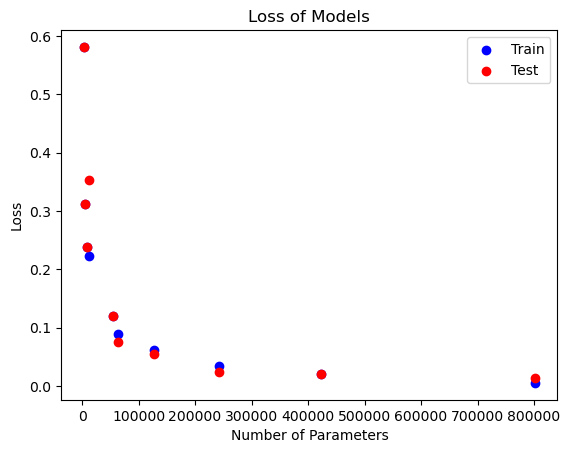

In [190]:
# Ensure all tensors are detached and converted to NumPy before plotting

# Training Loss
plt.scatter(model1params, train_losses_mod1.detach().numpy() if torch.is_tensor(train_losses_mod1) else train_losses_mod1, c='b', label='Train')
plt.scatter(model2params, train_losses_mod2.detach().numpy() if torch.is_tensor(train_losses_mod2) else train_losses_mod2, c='b')
plt.scatter(model3params, train_losses_mod3.detach().numpy() if torch.is_tensor(train_losses_mod3) else train_losses_mod3, c='b')
plt.scatter(model4params, train_losses_mod4.detach().numpy() if torch.is_tensor(train_losses_mod4) else train_losses_mod4, c='b')
plt.scatter(model5params, train_losses_mod5.detach().numpy() if torch.is_tensor(train_losses_mod5) else train_losses_mod5, c='b')
plt.scatter(model6params, train_losses_mod6.detach().numpy() if torch.is_tensor(train_losses_mod6) else train_losses_mod6, c='b')
plt.scatter(model7params, train_losses_mod7.detach().numpy() if torch.is_tensor(train_losses_mod7) else train_losses_mod7, c='b')
plt.scatter(model8params, train_losses_mod8.detach().numpy() if torch.is_tensor(train_losses_mod8) else train_losses_mod8, c='b')
plt.scatter(model9params, train_losses_mod9.detach().numpy() if torch.is_tensor(train_losses_mod9) else train_losses_mod9, c='b')
plt.scatter(model10params, train_losses_mod10.detach().numpy() if torch.is_tensor(train_losses_mod10) else train_losses_mod10, c='b')

# Testing Loss
plt.scatter(model1params, test_losses_mod1.detach().numpy() if torch.is_tensor(test_losses_mod1) else test_losses_mod1, c='r', label='Test')
plt.scatter(model2params, test_losses_mod2.detach().numpy() if torch.is_tensor(test_losses_mod2) else test_losses_mod2, c='r')
plt.scatter(model3params, test_losses_mod3.detach().numpy() if torch.is_tensor(test_losses_mod3) else test_losses_mod3, c='r')
plt.scatter(model4params, test_losses_mod4.detach().numpy() if torch.is_tensor(test_losses_mod4) else test_losses_mod4, c='r')
plt.scatter(model5params, test_losses_mod5.detach().numpy() if torch.is_tensor(test_losses_mod5) else test_losses_mod5, c='r')
plt.scatter(model6params, test_losses_mod6.detach().numpy() if torch.is_tensor(test_losses_mod6) else test_losses_mod6, c='r')
plt.scatter(model7params, test_losses_mod7.detach().numpy() if torch.is_tensor(test_losses_mod7) else test_losses_mod7, c='r')
plt.scatter(model8params, test_losses_mod8.detach().numpy() if torch.is_tensor(test_losses_mod8) else test_losses_mod8, c='r')
plt.scatter(model9params, test_losses_mod9.detach().numpy() if torch.is_tensor(test_losses_mod9) else test_losses_mod9, c='r')
plt.scatter(model10params, test_losses_mod10.detach().numpy() if torch.is_tensor(test_losses_mod10) else test_losses_mod10, c='r')

plt.title("Loss of Models")
plt.xlabel("Number of Parameters")
plt.ylabel("Loss")
plt.legend(loc="upper right")
plt.show()


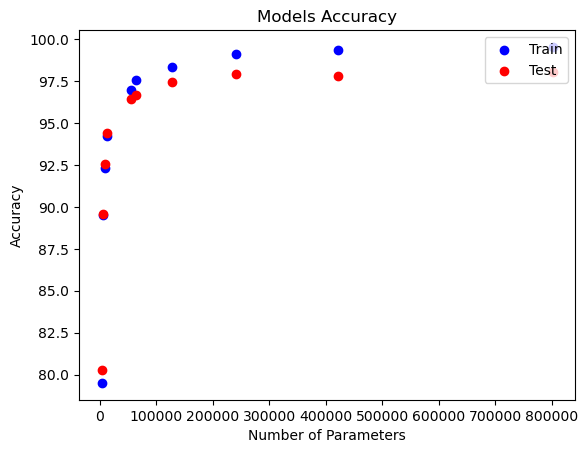

In [191]:
# Define the models and their accuracies in a loop for better organization
train_accuracies = [
    trn_accu_mod1, trn_accu_mod2, trn_accu_mod3, trn_accu_mod4,
    trn_accu_mod5, trn_accu_mod6, trn_accu_mod7, trn_accu_mod8,
    trn_accu_mod9, trn_accu_mod10
]

test_accuracies = [
    tst_accu_mod1, tst_accu_mod2, tst_accu_mod3, tst_accu_mod4,
    tst_accu_mod5, tst_accu_mod6, tst_accu_mod7, tst_accu_mod8,
    tst_accu_mod9, tst_accu_mod10
]

model_params = [
    model1params, model2params, model3params, model4params,
    model5params, model6params, model7params, model8params,
    model9params, model10params
]

# Plot Training Accuracy
for i, param in enumerate(model_params):
    plt.scatter(param, train_accuracies[i], c='b', label='Train' if i == 0 else "")

# Plot Testing Accuracy
for i, param in enumerate(model_params):
    plt.scatter(param, test_accuracies[i], c='r', label='Test' if i == 0 else "")

# Add plot labels and legend
plt.title("Models Accuracy")
plt.xlabel("Number of Parameters")
plt.ylabel("Accuracy")
plt.legend(loc="upper right")
plt.show()
